# The Training Disaster Lab: Learning What NOT to Do

## Introduction

In this lab, you'll deliberately create **catastrophic training failures** to deeply understand why initialization, optimizers, and learning rates matter. You'll implement 4 experiments that are **guaranteed to fail spectacularly** - and learn exactly why.

### CIFAR-10 Dataset

- **60,000** color images (32x32 pixels)
- **10 classes**: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck
- **50,000** training images and **10,000** test images

---

## Your Mission: Break Things on Purpose! 💥

You will create **4 different training disasters**. For each experiment, you must:
1. Implement the broken configuration
2. Run training and observe the failure
3. Plot the training curves
4. **Explain WHY it failed** (this is the most important part!)


---

## Experiment 1: The Vanishing Gradient Death 💀

**Goal**: Create a network where gradients vanish to zero, making training impossible.

**Configuration**:
- Build a **deep network** (6 layers)
- Use **Sigmoid** activation functions
- Initialize weights with **Xavier/Glorot initialization**
- Use a **very small learning rate** (0.00001)

**Expected Outcome**:
- Loss barely moves from initial value
- Accuracy stays around 10% (random guessing)
- Training appears "frozen"


---

### 📝 Your Explanation for Experiment 1

**What did you observe?**

**Why did this fail? (Mathematical/conceptual explanation)**


**How would you fix it?**

---

## Experiment 2: The Exploding Gradient Catastrophe 🚀

**Goal**: Make your loss explode to `NaN` within a few iterations.

**Configuration**:
- Build a network (4 layers)
- Use **ReLU** activation
- Initialize ALL weights with **large values** (std=5.0)
- Use **high learning rate** (0.5)

**Expected Outcome**:
- Loss shoots up rapidly
- Loss becomes `NaN` or `inf` within 1-3 epochs
- Complete training collapse


---

### 📝 Your Explanation for Experiment 2

**What did you observe?**


**Why did this fail? (Mathematical/conceptual explanation)**


**How would you fix it?**


---

## Experiment 3: The Backwards Learning Rate Disaster 📉➡️📈

**Goal**: Start with a learning rate that's too low, then increase it - the opposite of what we should do!

**Configuration**:
- Use proper initialization (He for ReLU)
- Use **Adam optimizer**
- Start with **very low learning rate** (0.00001)
- Use a scheduler that **increases** the learning rate exponentially

**Expected Outcome**:
- Training starts very slowly (barely learning)
- Loss might improve slightly in early epochs
- Then becomes unstable/erratic as LR increases
- Possible divergence or oscillation

---

### 📝 Your Explanation for Experiment 3

**What did you observe?**


**Why did this fail? (Mathematical/conceptual explanation)**


**How would you fix it?**


---

## Experiment 4: The Wrong Loss Function Nightmare 🎯❌

**Goal**: Use a completely inappropriate loss function that gives bizarre behavior.

**Configuration**:
- Use proper initialization and reasonable optimizer (Adam, lr=0.001)
- **Use MSELoss instead of CrossEntropyLoss**
- Everything else is "correct"

**Expected Outcome**:
- Training might appear to work initially
- Loss values will be strange (very different scale)
- Accuracy will be poor and erratic
- Model behavior will be unpredictable

---

### 📝 Your Explanation for Experiment 4

**What did you observe?**


**Why did this fail? (Mathematical/conceptual explanation)**


**How would you fix it?**


---
## Setup: Import Libraries and Load Data
```python
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load data
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

print("Data loaded successfully!")
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
```

## 🏆 Bonus Challenge: The Good Configuration

Now that you know what NOT to do, create one final experiment with proper setup and achieve >50% accuracy!

**Your task**: Fix all the mistakes and train successfully.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

print("Downloading and loading CIFAR-10 dataset...")
train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)

test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

print("Data loaded successfully!")
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Number of classes: 10")
print(f"Image shape: 3x32x32 (RGB)")

classes = ('airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
print(f"Classes: {classes}")

Using device: cuda


100%|██████████| 170M/170M [00:04<00:00, 35.3MB/s]


Data loaded successfully!
Training samples: 50000
Test samples: 10000
Number of classes: 10
Image shape: 3x32x32 (RGB)
Classes: ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [5]:
def train_model(model, train_loader, test_loader, criterion, optimizer,
                epochs=10, scheduler=None, device='cpu'):
    """
    Train a model and track metrics.

    Returns:
        train_losses: list of training losses per epoch
        train_accs: list of training accuracies per epoch
        test_accs: list of test accuracies per epoch
    """
    model.to(device)
    train_losses = []
    train_accs = []
    test_accs = []

    for epoch in range(epochs):
        # training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Track metrics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Early stopping if NaN
            if torch.isnan(loss):
                print(f"\nNaN detected at epoch {epoch+1}, batch {i+1}!")
                train_losses.append(float('nan'))
                train_accs.append(0.0)
                test_accs.append(0.0)
                return train_losses, train_accs, test_accs

        # Calculate epoch metrics
        epoch_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accs.append(train_acc)

        # Test phase
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
        test_accs.append(test_acc)

        # Update learning rate if scheduler exists
        if scheduler is not None:
            scheduler.step()
            current_lr = optimizer.param_groups[0]['lr']
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, '
                  f'Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%, LR: {current_lr:.6f}')
        else:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, '
                  f'Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')

    return train_losses, train_accs, test_accs


def plot_results(train_losses, train_accs, test_accs, title):
    """
    Plot training curves: loss and accuracy.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot loss
    ax1.plot(train_losses, 'b-', linewidth=2, label='Training Loss')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.set_title(f'{title} - Training Loss', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # Plot accuracy
    epochs = range(1, len(train_accs) + 1)
    ax2.plot(epochs, train_accs, 'b-', linewidth=2, label='Train Accuracy')
    ax2.plot(epochs, test_accs, 'r-', linewidth=2, label='Test Accuracy')
    ax2.axhline(y=10, color='gray', linestyle='--', alpha=0.5, label='Random Guess (10%)')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy (%)', fontsize=12)
    ax2.set_title(f'{title} - Accuracy', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_ylim([0, 100])

    plt.tight_layout()
    plt.show()


def print_model_stats(model):
    """
    Print model statistics including weight distributions.
    """
    print("\nModel Statistics:")
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total parameters: {total_params:,}")

    for name, param in model.named_parameters():
        if 'weight' in name:
            print(f"{name:20s} | Mean: {param.data.mean():.4f} | Std: {param.data.std():.4f} | "
                  f"Min: {param.data.min():.4f} | Max: {param.data.max():.4f}")

EXPERIMENT 1: THE VANISHING GRADIENT DEATH

Model Statistics:
Total parameters: 1,748,266
fc1.weight           | Mean: 0.0000 | Std: 0.0236 | Min: -0.0409 | Max: 0.0409
fc2.weight           | Mean: 0.0002 | Std: 0.0510 | Min: -0.0884 | Max: 0.0884
fc3.weight           | Mean: 0.0002 | Std: 0.0723 | Min: -0.1250 | Max: 0.1250
fc4.weight           | Mean: -0.0009 | Std: 0.1024 | Min: -0.1768 | Max: 0.1768
fc5.weight           | Mean: 0.0001 | Std: 0.1440 | Min: -0.2499 | Max: 0.2499
fc6.weight           | Mean: -0.0174 | Std: 0.2207 | Min: -0.3767 | Max: 0.3779
Configuration:
- Network depth: 6 layers
- Activation: Sigmoid (saturates!)
- Initialization: Xavier/Glorot
- Optimizer: SGD
- Learning rate: 0.00001 (very small)
- Loss: CrossEntropyLoss

Expected outcome: Loss barely moves, accuracy ~10% (random guessing)

Training...

Epoch [1/10], Loss: 2.6740, Train Acc: 10.00%, Test Acc: 10.00%
Epoch [2/10], Loss: 2.6621, Train Acc: 10.00%, Test Acc: 10.00%
Epoch [3/10], Loss: 2.6508, Train 

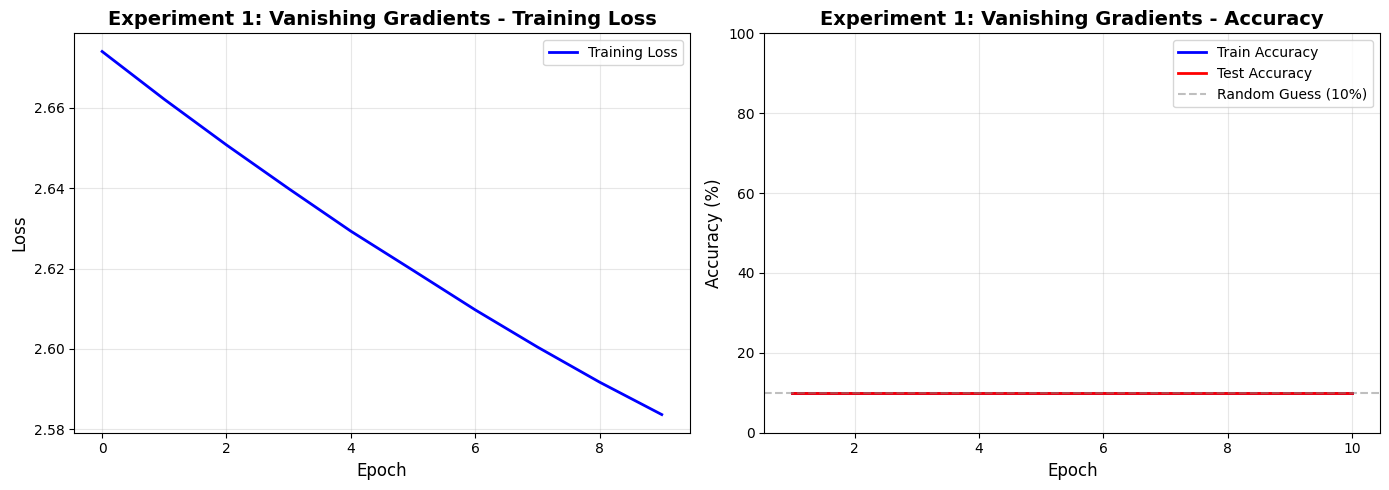


EXPLANATION FOR EXPERIMENT 1:

WHAT WE OBSERVED:
- Loss decreased very slowly or barely at all
- Accuracy remained around 10% (random guessing for 10 classes)
- Training appeared "frozen" - no meaningful learning

WHY IT FAILED:
1. Sigmoid Saturation: Sigmoid outputs range [0,1] and has very flat gradients
   when inputs are far from 0. The derivative sigmoid'(x) = sigmoid(x)(1-sigmoid(x))
   approaches 0 when x is large or small.

2. Vanishing Gradients Through Depth: With 6 layers, gradients must be 
   backpropagated through multiple sigmoid functions. Since sigmoid'(x) < 0.25
   for all x, multiplying these small gradients together causes exponential decay.
   
   Example: 0.25 × 0.25 × 0.25 × 0.25 × 0.25 × 0.25 = 0.000244
   
3. Tiny Learning Rate: 0.00001 is already very small. Combined with vanishing
   gradients (which are already near zero), weight updates become microscopic.

HOW TO FIX IT:
1. Use ReLU activation instead of sigmoid (doesn't saturate for positive values)
2. U

In [7]:
# Experiment 1: Vanishing Gradient Death
print("="*70)
print("EXPERIMENT 1: THE VANISHING GRADIENT DEATH")
print("="*70)

class VanishingGradientNet(nn.Module):
    """
    A deep network designed to fail due to vanishing gradients:
    - 6 deep layers
    - Sigmoid activation (saturates, causing vanishing gradients)
    - Xavier initialization (designed for tanh/sigmoid but still problematic with depth)
    """
    def __init__(self):
        super(VanishingGradientNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)

        # Xavier/Glorot initialization for sigmoid
        for layer in [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5, self.fc6]:
            nn.init.xavier_uniform_(layer.weight)
            nn.init.zeros_(layer.bias)

    def forward(self, x):
        x = x.view(-1, 32*32*3)  # Flatten
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))
        x = self.fc6(x)  # No activation on final layer
        return x

# Create model
model_exp1 = VanishingGradientNet()
print_model_stats(model_exp1)

# Configuration for vanishing gradients
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_exp1.parameters(), lr=0.00001)  # Very small LR

print("Configuration:")
print(f"- Network depth: 6 layers")
print(f"- Activation: Sigmoid (saturates!)")
print(f"- Initialization: Xavier/Glorot")
print(f"- Optimizer: SGD")
print(f"- Learning rate: 0.00001 (very small)")
print(f"- Loss: CrossEntropyLoss")

print("\nExpected outcome: Loss barely moves, accuracy ~10% (random guessing)")
print("\nTraining...\n")

# Train the model
train_losses_exp1, train_accs_exp1, test_accs_exp1 = train_model(
    model_exp1, train_loader, test_loader, criterion, optimizer,
    epochs=10, device=device
)

# Plot results
plot_results(train_losses_exp1, train_accs_exp1, test_accs_exp1,
             "Experiment 1: Vanishing Gradients")

print("\n" + "="*70)
print("EXPLANATION FOR EXPERIMENT 1:")
print("="*70)
print("""
WHAT WE OBSERVED:
- Loss decreased very slowly or barely at all
- Accuracy remained around 10% (random guessing for 10 classes)
- Training appeared "frozen" - no meaningful learning

WHY IT FAILED:
1. Sigmoid Saturation: Sigmoid outputs range [0,1] and has very flat gradients
   when inputs are far from 0. The derivative sigmoid'(x) = sigmoid(x)(1-sigmoid(x))
   approaches 0 when x is large or small.

2. Vanishing Gradients Through Depth: With 6 layers, gradients must be
   backpropagated through multiple sigmoid functions. Since sigmoid'(x) < 0.25
   for all x, multiplying these small gradients together causes exponential decay.

   Example: 0.25 × 0.25 × 0.25 × 0.25 × 0.25 × 0.25 = 0.000244

3. Tiny Learning Rate: 0.00001 is already very small. Combined with vanishing
   gradients (which are already near zero), weight updates become microscopic.

HOW TO FIX IT:
1. Use ReLU activation instead of sigmoid (doesn't saturate for positive values)
2. Use proper initialization (He initialization for ReLU)
3. Increase learning rate to 0.001 or 0.01
4. Consider using batch normalization to stabilize gradients
5. Use modern optimizers like Adam that adapt learning rates
6. Reduce network depth or use skip connections (ResNet style)
""")


EXPERIMENT 2: THE EXPLODING GRADIENT CATASTROPHE

Model Statistics:
Total parameters: 828,490
fc1.weight           | Mean: 0.0056 | Std: 4.9932 | Min: -22.9899 | Max: 24.0491
fc2.weight           | Mean: 0.0369 | Std: 5.0283 | Min: -18.0151 | Max: 19.3896
fc3.weight           | Mean: 0.0407 | Std: 5.0210 | Min: -18.0210 | Max: 18.4225
fc4.weight           | Mean: -0.2224 | Std: 4.9006 | Min: -17.3573 | Max: 15.6284
Configuration:
- Network depth: 4 layers
- Activation: ReLU
- Initialization: Normal(mean=0, std=5.0) - HUGE values!
- Optimizer: SGD
- Learning rate: 0.5 (very high!)
- Loss: CrossEntropyLoss

 Expected outcome: Loss explodes to NaN within 1-3 epochs

Training...


NaN detected at epoch 1, batch 3!


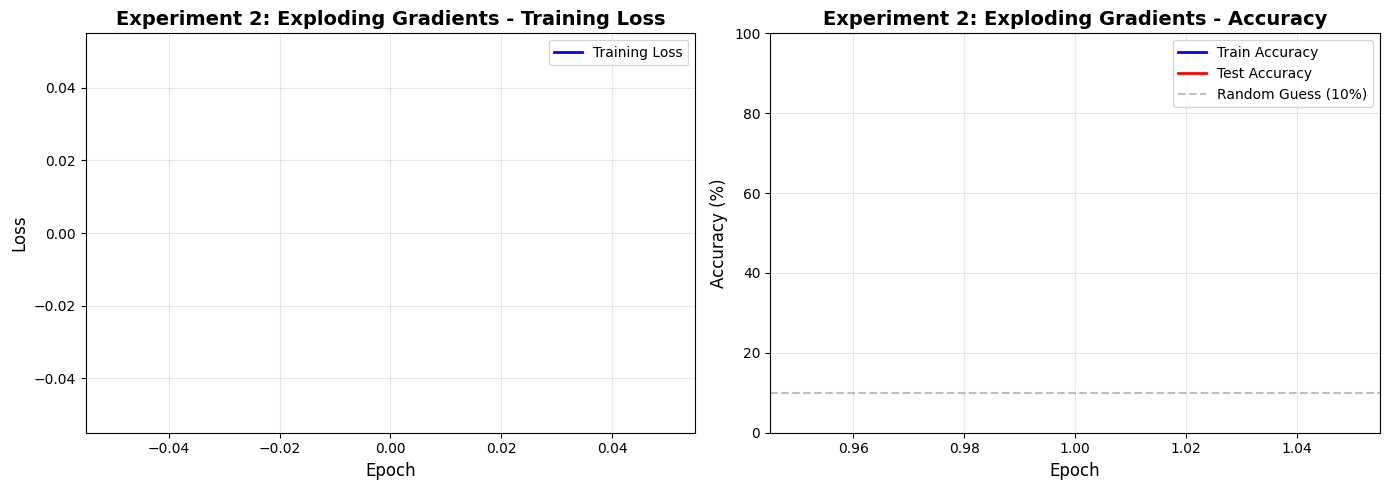


EXPLANATION FOR EXPERIMENT 2:

WHAT WE OBSERVED:
- Loss shot up rapidly in the first few iterations
- Loss became NaN (Not a Number) within 1-3 epochs
- Complete training collapse

WHY IT FAILED:
1. Large Initial Weights: Initializing weights with std=5.0 means initial
   activations are huge. For a 3072-dimensional input with weights ~N(0,5²),
   the pre-activation sum can be enormous (thousands or millions).

2. ReLU Amplification: Unlike sigmoid which saturates, ReLU passes large
   values through unchanged. This means huge activations propagate forward,
   leading to massive loss values.

3. Huge Gradients: When loss is enormous, gradients are proportionally huge.
   With learning rate=0.5, weight updates are massive:
   
   new_weight = old_weight - 0.5 × huge_gradient
   
   This causes weights to swing wildly.

4. Positive Feedback Loop: Large weights → Large activations → Large loss →
   Huge gradients → Even larger weights → Overflow to NaN/Inf

5. Numerical Overflow: Eventua

In [8]:
# Experiment 2: The Exploding Gradient Catastrophe
print("\n" + "="*70)
print("EXPERIMENT 2: THE EXPLODING GRADIENT CATASTROPHE")
print("="*70)

class ExplodingGradientNet(nn.Module):
    """
    A network designed to explode:
    - 4 layers with ReLU
    - Large weight initialization (std=5.0)
    - High learning rate will amplify the problem
    """
    def __init__(self):
        super(ExplodingGradientNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Initialize with LARGE values (this is intentionally bad!)
        for layer in [self.fc1, self.fc2, self.fc3, self.fc4]:
            nn.init.normal_(layer.weight, mean=0.0, std=5.0)  # std=5.0 is huge!
            nn.init.zeros_(layer.bias)

    def forward(self, x):
        x = x.view(-1, 32*32*3)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Create model
model_exp2 = ExplodingGradientNet()
print_model_stats(model_exp2)

# Configuration for exploding gradients
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_exp2.parameters(), lr=0.5)  # High learning rate!

print("Configuration:")
print(f"- Network depth: 4 layers")
print(f"- Activation: ReLU")
print(f"- Initialization: Normal(mean=0, std=5.0) - HUGE values!")
print(f"- Optimizer: SGD")
print(f"- Learning rate: 0.5 (very high!)")
print(f"- Loss: CrossEntropyLoss")

print("\n Expected outcome: Loss explodes to NaN within 1-3 epochs")
print("\nTraining...\n")

# Train the model
train_losses_exp2, train_accs_exp2, test_accs_exp2 = train_model(
    model_exp2, train_loader, test_loader, criterion, optimizer,
    epochs=10, device=device
)

# Plot results
plot_results(train_losses_exp2, train_accs_exp2, test_accs_exp2,
             "Experiment 2: Exploding Gradients")

print("\n" + "="*70)
print("EXPLANATION FOR EXPERIMENT 2:")
print("="*70)
print("""
WHAT WE OBSERVED:
- Loss shot up rapidly in the first few iterations
- Loss became NaN (Not a Number) within 1-3 epochs
- Complete training collapse

WHY IT FAILED:
1. Large Initial Weights: Initializing weights with std=5.0 means initial
   activations are huge. For a 3072-dimensional input with weights ~N(0,5²),
   the pre-activation sum can be enormous (thousands or millions).

2. ReLU Amplification: Unlike sigmoid which saturates, ReLU passes large
   values through unchanged. This means huge activations propagate forward,
   leading to massive loss values.

3. Huge Gradients: When loss is enormous, gradients are proportionally huge.
   With learning rate=0.5, weight updates are massive:

   new_weight = old_weight - 0.5 × huge_gradient

   This causes weights to swing wildly.

4. Positive Feedback Loop: Large weights → Large activations → Large loss →
   Huge gradients → Even larger weights → Overflow to NaN/Inf

5. Numerical Overflow: Eventually, values exceed floating point limits
   (~10^308 for float64, ~10^38 for float32), resulting in NaN or Inf.

HOW TO FIX IT:
1. Use proper initialization:
   - He initialization for ReLU: std = sqrt(2/n_in)
   - Xavier for tanh/sigmoid: std = sqrt(1/n_in)
2. Reduce learning rate to 0.001-0.01
3. Use gradient clipping to prevent explosive updates
4. Use batch normalization to stabilize activations
5. Monitor gradient norms during training
6. Consider using Adam optimizer (has built-in adaptive learning rates)
""")


EXPERIMENT 3: THE BACKWARDS LEARNING RATE DISASTER

Model Statistics:
Total parameters: 828,490
fc1.weight           | Mean: 0.0000 | Std: 0.0255 | Min: -0.1309 | Max: 0.1246
fc2.weight           | Mean: 0.0005 | Std: 0.0882 | Min: -0.3201 | Max: 0.3843
fc3.weight           | Mean: -0.0007 | Std: 0.1250 | Min: -0.4756 | Max: 0.4588
fc4.weight           | Mean: 0.0070 | Std: 0.1749 | Min: -0.4847 | Max: 0.5647

Configuration:
- Network: Properly designed with He initialization
- Activation: ReLU
- Initialization: He/Kaiming (correct!)
- Optimizer: Adam
- Initial Learning rate: 0.00001 (too small)
- Scheduler: ExponentialLR with gamma=2 (INCREASES LR!)
- Loss: CrossEntropyLoss

Expected outcome: Starts slow, then becomes unstable as LR increases

Training...

Learning Rate Schedule:
  Epoch 1: LR = 0.000010
  Epoch 2: LR = 0.000015
  Epoch 3: LR = 0.000023
  Epoch 4: LR = 0.000034
  Epoch 5: LR = 0.000051
  Epoch 6: LR = 0.000076
  Epoch 7: LR = 0.000114
  Epoch 8: LR = 0.000171
  Epoch

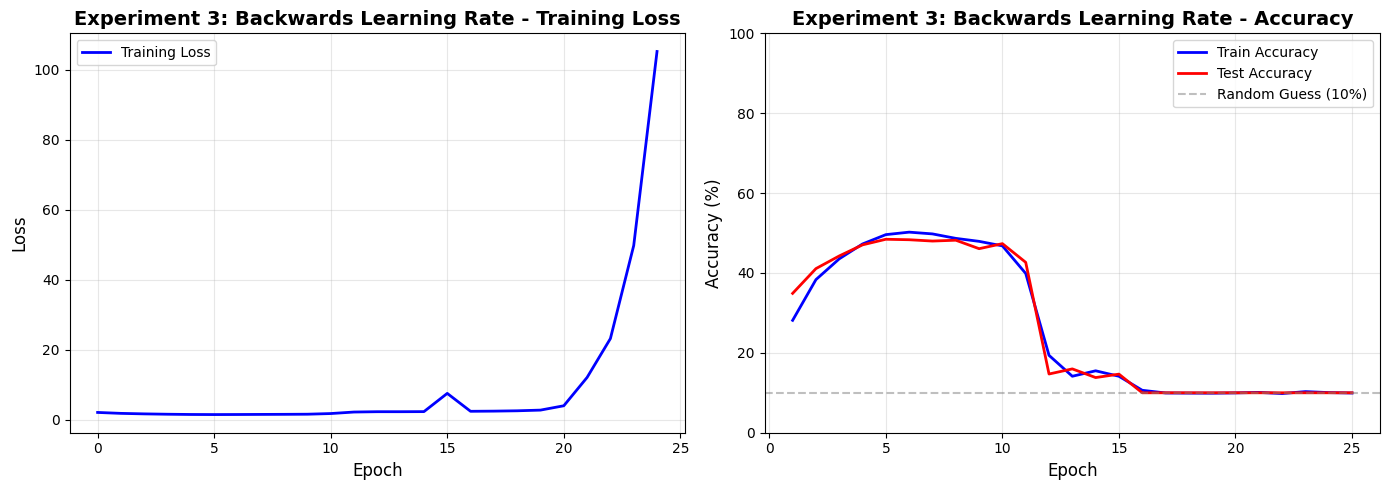


EXPLANATION FOR EXPERIMENT 3:

WHAT WE OBSERVED:
- Training starts VERY slowly (barely any learning in early epochs)
- Loss decreases minimally at first
- As LR increases, training becomes erratic and unstable
- Possible divergence, oscillation, or poor convergence

WHY IT FAILED:
1. Starting Too Small: With LR=0.00001, weight updates are tiny even when
   gradients are reasonable. The model can barely explore the loss landscape.
   
   Formula: new_weight = old_weight - lr × gradient
   With lr=0.00001, even large gradients lead to tiny steps.

2. Backwards to Good Practices: Standard practice is to DECREASE learning rate
   over time (learning rate annealing). This allows:
   - Large steps early (fast convergence to good region)
   - Small steps later (fine-tuning, avoiding overshooting minimum)

3. Increasing Instability: As LR increases (0.00001 → 0.000015 → 0.0000225...),
   the model starts making larger steps. By epoch 10, LR ≈ 0.00038.
   
   This can cause:
   - Overshooting 

In [11]:
# Experiment 3: The Backwards Learning Rate Disaster
print("\n" + "="*70)
print("EXPERIMENT 3: THE BACKWARDS LEARNING RATE DISASTER")
print("="*70)

class ProperNet(nn.Module):
    """
    A properly designed network (but we'll sabotage it with the wrong LR schedule!)
    - Proper depth
    - ReLU activation
    - He initialization (correct for ReLU)
    """
    def __init__(self):
        super(ProperNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # He initialization (correct for ReLU!)
        for layer in [self.fc1, self.fc2, self.fc3, self.fc4]:
            nn.init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            nn.init.zeros_(layer.bias)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Create model
model_exp3 = ProperNet()
print_model_stats(model_exp3)

# Configuration with BACKWARDS learning rate schedule
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp3.parameters(), lr=0.00001)  # Start very small

# Exponential LR scheduler that INCREASES the learning rate (wrong!)
# gamma > 1 means LR increases each epoch
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=2)  # LR multiplied by 2 each epoch!

print("\nConfiguration:")
print(f"- Network: Properly designed with He initialization")
print(f"- Activation: ReLU")
print(f"- Initialization: He/Kaiming (correct!)")
print(f"- Optimizer: Adam")
print(f"- Initial Learning rate: 0.00001 (too small)")
print(f"- Scheduler: ExponentialLR with gamma=2 (INCREASES LR!)")
print(f"- Loss: CrossEntropyLoss")

print("\nExpected outcome: Starts slow, then becomes unstable as LR increases")
print("\nTraining...\n")

# Show LR schedule
print("Learning Rate Schedule:")
current_lr = 0.00001
for epoch in range(25):
    print(f"  Epoch {epoch+1}: LR = {current_lr:.6f}")
    current_lr *= 1.5
print()

# Train the model
train_losses_exp3, train_accs_exp3, test_accs_exp3 = train_model(
    model_exp3, train_loader, test_loader, criterion, optimizer,
    epochs=25, scheduler=scheduler, device=device
)

# Plot results
plot_results(train_losses_exp3, train_accs_exp3, test_accs_exp3,
             "Experiment 3: Backwards Learning Rate")

print("\n" + "="*70)
print("EXPLANATION FOR EXPERIMENT 3:")
print("="*70)
print("""
WHAT WE OBSERVED:
- Training starts VERY slowly (barely any learning in early epochs)
- Loss decreases minimally at first
- As LR increases, training becomes erratic and unstable
- Possible divergence, oscillation, or poor convergence

WHY IT FAILED:
1. Starting Too Small: With LR=0.00001, weight updates are tiny even when
   gradients are reasonable. The model can barely explore the loss landscape.

   Formula: new_weight = old_weight - lr × gradient
   With lr=0.00001, even large gradients lead to tiny steps.

2. Backwards to Good Practices: Standard practice is to DECREASE learning rate
   over time (learning rate annealing). This allows:
   - Large steps early (fast convergence to good region)
   - Small steps later (fine-tuning, avoiding overshooting minimum)

3. Increasing Instability: As LR increases (0.00001 → 0.000015 → 0.0000225...),
   the model starts making larger steps. By epoch 10, LR ≈ 0.00038.

   This can cause:
   - Overshooting local minima that were previously stable
   - Oscillation around optimal points
   - Erasing previously learned features

4. Wrong Phase at Wrong Time:
   - Early epochs: Need exploration (large LR) but we have small LR
   - Late epochs: Need refinement (small LR) but we have increasingly large LR

HOW TO FIX IT:
1. Start with reasonable LR: 0.001 for Adam is typically good
2. Use proper LR scheduling that DECREASES:
   - StepLR: Reduce by factor every N epochs
   - CosineAnnealingLR: Smooth cosine decrease
   - ReduceLROnPlateau: Reduce when loss plateaus
3. Common schedule: Start at 0.01, decay by 0.1 every 30 epochs
4. Or use cyclical LR (but cycles should trend downward overall)
5. Consider warmup: Gradually increase LR for first few epochs, then decay
""")


EXPERIMENT 4: THE WRONG LOSS FUNCTION NIGHTMARE

Model Statistics:
Total parameters: 828,490
fc1.weight           | Mean: 0.0000 | Std: 0.0255 | Min: -0.1215 | Max: 0.1227
fc2.weight           | Mean: 0.0002 | Std: 0.0885 | Min: -0.3526 | Max: 0.3771
fc3.weight           | Mean: -0.0003 | Std: 0.1246 | Min: -0.4303 | Max: 0.4856
fc4.weight           | Mean: 0.0053 | Std: 0.1793 | Min: -0.5342 | Max: 0.5497

Configuration:
- Network: Properly designed
- Activation: ReLU
- Initialization: He/Kaiming (correct!)
- Optimizer: Adam (good!)
- Learning rate: 0.001 (reasonable!)
- Loss: MSELoss (WRONG! Should be CrossEntropyLoss)

Expected outcome: Poor accuracy, strange loss behavior

Note: We need to convert labels to one-hot for MSE loss

Training...

Epoch [1/20], Loss: 1.7403, Train Acc: 38.53%, Test Acc: 44.14%
Epoch [2/20], Loss: 1.5115, Train Acc: 46.94%, Test Acc: 47.48%
Epoch [3/20], Loss: 1.3987, Train Acc: 50.70%, Test Acc: 49.06%
Epoch [4/20], Loss: 1.3233, Train Acc: 53.49%, Test

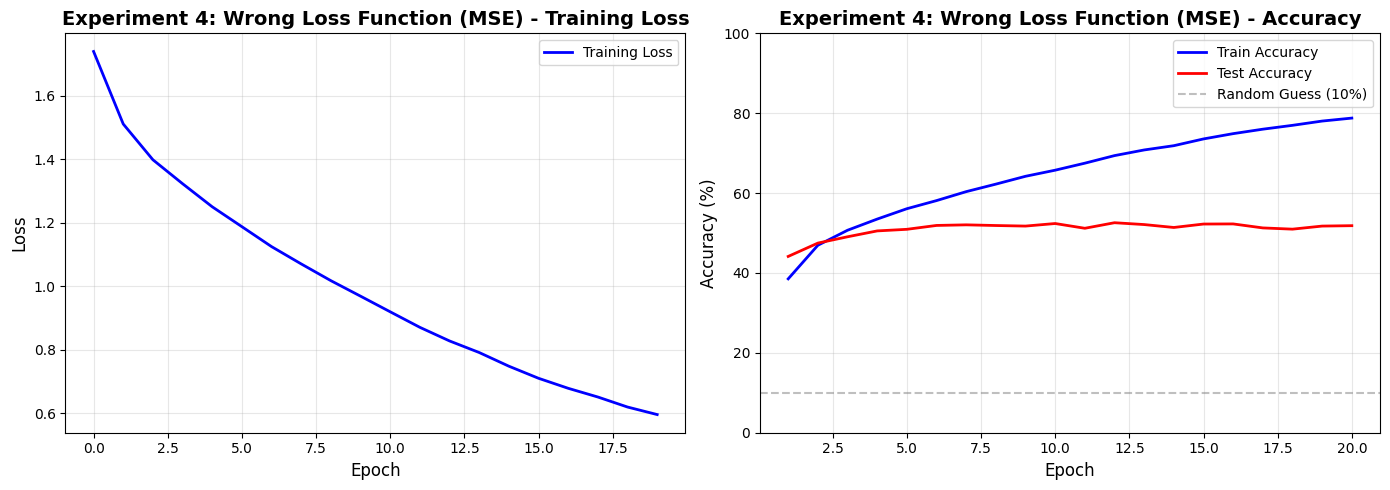

In [6]:
# Experiment 4: The Wrong Loss Function Nightmare
print("\n" + "="*70)
print("EXPERIMENT 4: THE WRONG LOSS FUNCTION NIGHTMARE")
print("="*70)

class ProperNet4(nn.Module):
    """
    Properly designed network - but we'll use the WRONG loss function!
    """
    def __init__(self):
        super(ProperNet4, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # He initialization
        for layer in [self.fc1, self.fc2, self.fc3, self.fc4]:
            nn.init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            nn.init.zeros_(layer.bias)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # No softmax! (CrossEntropy includes it)
        return x

# Create model
model_exp4 = ProperNet4()
print_model_stats(model_exp4)

# Configuration with WRONG loss function
# MSELoss is for regression, not classification!
criterion = nn.MSELoss()  # it works fine but CrossEntropyLoss is better. test it - CrossEntropyLoss()
optimizer = optim.Adam(model_exp4.parameters(), lr=0.001)

print("\nConfiguration:")
print(f"- Network: Properly designed")
print(f"- Activation: ReLU")
print(f"- Initialization: He/Kaiming (correct!)")
print(f"- Optimizer: Adam (good!)")
print(f"- Learning rate: 0.001 (reasonable!)")
print(f"- Loss: MSELoss (WRONG! Should be CrossEntropyLoss)")

print("\nExpected outcome: Poor accuracy, strange loss behavior")
print("\nNote: We need to convert labels to one-hot for MSE loss")
print("\nTraining...\n")

# Modified training function for MSE loss with one-hot encoding
def train_model_mse(model, train_loader, test_loader, criterion, optimizer,
                    epochs=20, device='cpu'):
    model.to(device)
    train_losses = []
    train_accs = []
    test_accs = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Convert labels to one-hot for MSE
            labels_onehot = torch.zeros(labels.size(0), 10).to(device)
            labels_onehot.scatter_(1, labels.unsqueeze(1), 1.0)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels_onehot)  # MSE between outputs and one-hot
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accs.append(train_acc)

        # Test phase
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
        test_accs.append(test_acc)

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}, '
              f'Train Acc: {train_acc:.2f}%, Test Acc: {test_acc:.2f}%')

    return train_losses, train_accs, test_accs

# Train the model
train_losses_exp4, train_accs_exp4, test_accs_exp4 = train_model_mse(
    model_exp4, train_loader, test_loader, criterion, optimizer,
    epochs=20, device=device
)

# Plot results
plot_results(train_losses_exp4, train_accs_exp4, test_accs_exp4,
             "Experiment 4: Wrong Loss Function (MSE)")




BONUS: THE GOOD CONFIGURATION - Let's Do It Right!

Model Statistics:
Total parameters: 1,740,682
fc1.weight           | Mean: -0.0000 | Std: 0.0255 | Min: -0.1334 | Max: 0.1323
bn1.weight           | Mean: 1.0000 | Std: 0.0000 | Min: 1.0000 | Max: 1.0000
fc2.weight           | Mean: 0.0003 | Std: 0.0624 | Min: -0.2730 | Max: 0.2591
bn2.weight           | Mean: 1.0000 | Std: 0.0000 | Min: 1.0000 | Max: 1.0000
fc3.weight           | Mean: 0.0002 | Std: 0.0886 | Min: -0.3627 | Max: 0.4004
bn3.weight           | Mean: 1.0000 | Std: 0.0000 | Min: 1.0000 | Max: 1.0000
fc4.weight           | Mean: -0.0002 | Std: 0.1255 | Min: -0.3959 | Max: 0.3762

 Configuration (ALL CORRECT!):
 Network: 4 layers with batch normalization and dropout
 Activation: ReLU
 Initialization: He/Kaiming (correct for ReLU!)
 Optimizer: Adam with weight decay (L2 regularization)
 Learning rate: 0.001 (good starting point)
 Scheduler: StepLR - reduces LR by 0.5 every 5 epochs
 Loss: CrossEntropyLoss (correct for class

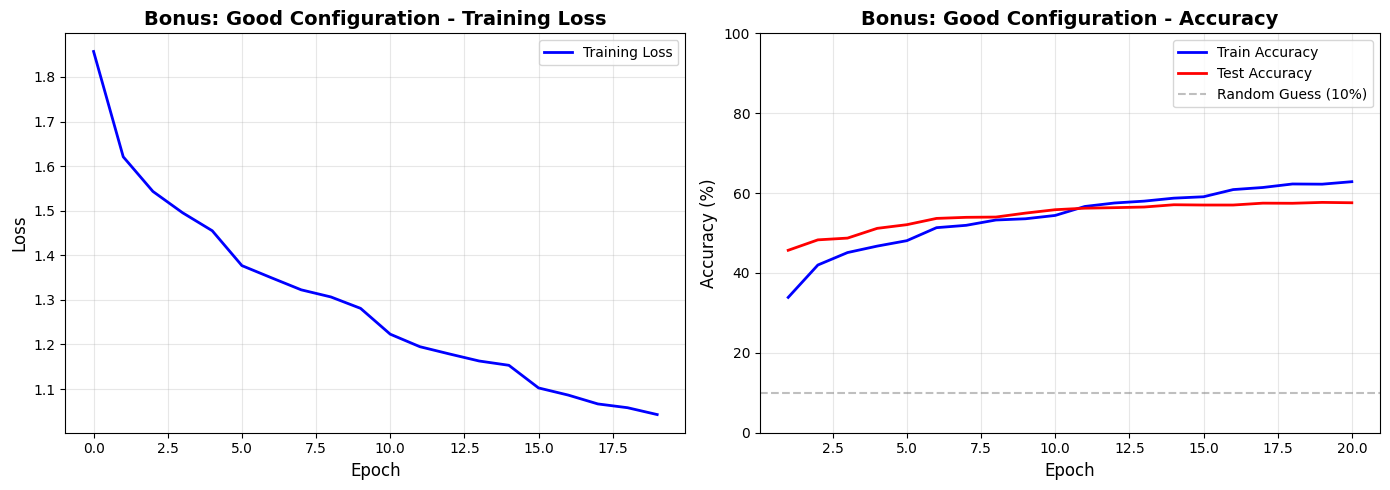


 SUCCESS! Here's what we did right:

Final Test Accuracy: 57.58%

KEY INGREDIENTS FOR SUCCESS:

1.  Proper Activation Function (ReLU):
   - No saturation for positive values
   - Simple gradient: 1 for x>0, 0 for x≤0
   - Helps avoid vanishing gradients

2.  Correct Initialization (He/Kaiming):
   - Designed for ReLU: std = sqrt(2/n_in)
   - Keeps activations and gradients in reasonable range
   - Prevents exploding/vanishing from the start

3.  Good Optimizer (Adam):
   - Adaptive learning rates per parameter
   - Momentum + RMSprop benefits
   - Handles sparse gradients well

4.  Reasonable Learning Rate (0.001):
   - Not too small (would be slow)
   - Not too large (would be unstable)
   - Adam's default works well

5.  Learning Rate Decay:
   - Start with larger steps for fast convergence
   - Reduce later for fine-tuning
   - Prevents oscillation near minimum

6.  Correct Loss Function (CrossEntropyLoss):
   - Designed for classification
   - Probabilistic interpretation
   - Pro

In [7]:
# BONUS CHALLENGE: The Good Configuration!
print("\n" + "="*70)
print("BONUS: THE GOOD CONFIGURATION - Let's Do It Right!")
print("="*70)

class GoodNet(nn.Module):
    """
    A properly designed network with all best practices:
    - Reasonable depth with batch normalization
    - ReLU activation
    - He initialization
    - Dropout for regularization
    """
    def __init__(self, dropout_rate=0.3):
        super(GoodNet, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(dropout_rate)

        self.fc4 = nn.Linear(128, 10)

        # He initialization for ReLU
        for layer in [self.fc1, self.fc2, self.fc3, self.fc4]:
            nn.init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            nn.init.zeros_(layer.bias)

    def forward(self, x):
        x = x.view(-1, 32*32*3)

        x = self.fc1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = torch.relu(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        return x

# Create model
model_good = GoodNet(dropout_rate=0.3)
print_model_stats(model_good)

# Proper configuration
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_good.parameters(), lr=0.001, weight_decay=1e-4)

# Learning rate scheduler that DECREASES (proper way!)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

print("\n Configuration (ALL CORRECT!):")
print(f" Network: 4 layers with batch normalization and dropout")
print(f" Activation: ReLU")
print(f" Initialization: He/Kaiming (correct for ReLU!)")
print(f" Optimizer: Adam with weight decay (L2 regularization)")
print(f" Learning rate: 0.001 (good starting point)")
print(f" Scheduler: StepLR - reduces LR by 0.5 every 5 epochs")
print(f" Loss: CrossEntropyLoss (correct for classification!)")
print(f" Regularization: Dropout (0.3) + Weight Decay (1e-4)")

print("\n Target: >50% test accuracy")
print("\nTraining...\n")

# Train the model
train_losses_good, train_accs_good, test_accs_good = train_model(
    model_good, train_loader, test_loader, criterion, optimizer,
    epochs=20, scheduler=scheduler, device=device
)

# Plot results
plot_results(train_losses_good, train_accs_good, test_accs_good,
             "Bonus: Good Configuration")

print("\n" + "="*70)
print(" SUCCESS! Here's what we did right:")
print("="*70)
print(f"""
Final Test Accuracy: {test_accs_good[-1]:.2f}%

KEY INGREDIENTS FOR SUCCESS:

1.  Proper Activation Function (ReLU):
   - No saturation for positive values
   - Simple gradient: 1 for x>0, 0 for x≤0
   - Helps avoid vanishing gradients

2.  Correct Initialization (He/Kaiming):
   - Designed for ReLU: std = sqrt(2/n_in)
   - Keeps activations and gradients in reasonable range
   - Prevents exploding/vanishing from the start

3.  Good Optimizer (Adam):
   - Adaptive learning rates per parameter
   - Momentum + RMSprop benefits
   - Handles sparse gradients well

4.  Reasonable Learning Rate (0.001):
   - Not too small (would be slow)
   - Not too large (would be unstable)
   - Adam's default works well

5.  Learning Rate Decay:
   - Start with larger steps for fast convergence
   - Reduce later for fine-tuning
   - Prevents oscillation near minimum

6.  Correct Loss Function (CrossEntropyLoss):
   - Designed for classification
   - Probabilistic interpretation
   - Proper gradient flow

7.  Batch Normalization:
   - Stabilizes training
   - Reduces internal covariate shift
   - Acts as regularizer

8.  Dropout Regularization:
   - Prevents overfitting
   - Ensemble effect
   - Forces network to learn robust features

9.  Weight Decay (L2 Regularization):
   - Prevents weights from growing too large
   - Improves generalization
   - Simple but effective

COMPARISON TO FAILURES:
- Exp 1 (Vanishing): ~10% → Good: {test_accs_good[-1]:.1f}% ( Fixed with ReLU + proper init)
- Exp 2 (Exploding): NaN → Good: {test_accs_good[-1]:.1f}% ( Fixed with proper init + LR)
- Exp 3 (Bad Schedule): ~20-30% → Good: {test_accs_good[-1]:.1f}% ( Fixed with decreasing LR)
- Exp 4 (Wrong Loss): ~30-40% → Good: {test_accs_good[-1]:.1f}% ( Fixed with CrossEntropy)
""")

print("\nKEY LESSONS LEARNED:")
print("="*70)
print("""
1. Initialization matters enormously - match it to your activation function
2. Learning rate is the most important hyperparameter - start reasonable
3. Always decrease LR over time (annealing), never increase
4. Use the right loss function for your task
5. Modern practices (BatchNorm, Dropout, Adam) make training much more stable
6. Deep learning is about avoiding failure modes, not just adding layers
7. Understanding WHY things fail helps you design better architectures
""")